In [2]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline


In [181]:
cars = pd.read_csv('/content/drive/MyDrive/car/mix_data.csv', error_bad_lines=False, delimiter='\t')
print(cars.shape)
cars.head()

(54974, 12)


,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche


In [182]:

cars['nam_sx'] = cars['nam_sx'].replace(['Trước 1990'],'1990')
cars['nam_sx'] = cars['nam_sx'].replace(['trước năm 1980'],'1980')
cars['so_cho_ngoi'] = cars['so_cho_ngoi'].replace(['Khác'],'8')

In [183]:
cars

,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,0,Sedan,Tự động,9000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2019,4480000000,Sclass,Mercedes Benz
1,1,Sedan,Tự động,20000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2017,1155000000,Cclass,Mercedes Benz
2,2,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,579000000,Kona,Hyundai
3,3,SUV / Cross over,Tự động,0,Xăng,5,Mới,Lắp ráp trong nước,2021,825000000,Tucson,Hyundai
4,4,Sedan,Tự động,32000,Xăng,4,Đã sử dụng,Nhập khẩu,2017,5750000000,Panamera,Porsche
...,...,...,...,...,...,...,...,...,...,...,...,...
54969,54991,Van/Minivan,Số sàn,80000,Xăng,8,Đã sử dụng,Lắp ráp trong nước,2019,565000000,Innova,Toyota
54970,54992,Sedan,Tự động,38000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2018,563000000,3,Mazda
54971,54993,Hatchback,Tự động,70000,Xăng,5,Đã sử dụng,Lắp ráp trong nước,2009,185000000,Morning,Kia
54972,54994,Sedan,Số sàn,2555,Xăng,5,Đã sử dụng,Nhập khẩu,1999,42500000,Matiz,Daewoo


In [170]:
to_numeric_cols = ['km_da_di', 'gia']
cars[to_numeric_cols] = cars[to_numeric_cols].astype(float)

to_numeric_cols = [ 'nam_sx', 'so_cho_ngoi']
cars[to_numeric_cols] = cars[to_numeric_cols].astype(int)

cars.dtypes

Unnamed: 0       int64
kieu_dang        int64
hop_so           int64
km_da_di       float64
nhien_lieu       int64
so_cho_ngoi      int64
tinh_trang       int64
xuat_xu          int64
nam_sx           int64
gia            float64
dong_xe          int64
hang             int64
dtype: object

In [178]:
cars.head()

,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
0,0,7,3,9000.0,2,5,1,0,2019,4.480000e+09,513,64
1,1,7,3,20000.0,2,5,1,0,2017,1.155000e+09,165,64
2,2,6,3,0.0,2,5,0,0,2021,5.790000e+08,340,38
3,3,6,3,0.0,2,5,0,0,2021,8.250000e+08,570,38
4,4,7,3,32000.0,2,4,1,1,2017,5.750000e+09,427,70


In [172]:
cars.describe()

,Unnamed: 0,kieu_dang,hop_so,km_da_di,nhien_lieu,so_cho_ngoi,tinh_trang,xuat_xu,nam_sx,gia,dong_xe,hang
count,54974.000000,54974.000000,54974.000000,5.497400e+04,54974.000000,54974.000000,54974.000000,54974.000000,54974.000000,5.497400e+04,54974.000000,54974.000000
mean,27496.001564,5.876305,2.533216,1.657146e+05,1.649234,5.599465,0.827428,0.400171,2015.197548,8.839468e+08,336.552770,54.901390
std,15877.932631,2.154902,0.723614,1.844488e+07,0.759195,1.698210,0.377881,0.489937,5.863556,3.069527e+09,178.816508,24.535899
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1980.000000,0.000000e+00,0.000000,0.000000
25%,13744.250000,6.000000,2.000000,0.000000e+00,2.000000,5.000000,1.000000,0.000000,2012.000000,2.950000e+08,180.000000,38.000000
50%,27489.500000,6.000000,3.000000,1.900000e+04,2.000000,5.000000,1.000000,0.000000,2017.000000,5.000000e+08,328.000000,53.000000
75%,41249.750000,7.000000,3.000000,6.375550e+04,2.000000,7.000000,1.000000,1.000000,2020.000000,8.090000e+08,490.000000,82.000000
max,54995.000000,10.000000,3.000000,4.294967e+09,3.000000,16.000000,1.000000,1.000000,2022.000000,4.990000e+11,644.000000,95.000000


In [184]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

enc = OneHotEncoder(sparse=False)
transformed = enc.fit_transform(cars['kieu_dang'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out(['kieu_dang']))
data = pd.concat([cars, ohe_df], axis=1).drop(['kieu_dang'], axis=1)

In [186]:
transformed = enc.fit_transform(cars['hop_so'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out(['hop_so']))
data = pd.concat([data, ohe_df], axis=1).drop(['hop_so'], axis=1)

In [187]:
transformed = enc.fit_transform(cars['nhien_lieu'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out(['nhien_lieu']))
data = pd.concat([data, ohe_df], axis=1).drop(['nhien_lieu'], axis=1)

In [188]:
transformed = enc.fit_transform(cars['tinh_trang'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out(['tinh_trang']))
data = pd.concat([data, ohe_df], axis=1).drop(['tinh_trang'], axis=1)

In [189]:
transformed = enc.fit_transform(cars['xuat_xu'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(transformed, columns=enc.get_feature_names_out(['xuat_xu']))
data = pd.concat([data, ohe_df], axis=1).drop(['xuat_xu'], axis=1)

In [194]:
data.dong_xe.unique().size

645

In [200]:
dong_xe_enc = LabelEncoder()
dong_xe_enc.fit(data['dong_xe'])
data['dong_xe'] = dong_xe_enc.transform(data['dong_xe'])

In [201]:
hang_enc = LabelEncoder()
hang_enc.fit(data['hang'])
data['hang'] = hang_enc.transform(data['hang'])

In [206]:
to_numeric_cols = [ 'nam_sx', 'so_cho_ngoi']
data[to_numeric_cols] = data[to_numeric_cols].astype(int)

to_numeric_cols = ['km_da_di', 'gia']
data[to_numeric_cols] = data[to_numeric_cols].astype(float)

data.dtypes


km_da_di                           float64
so_cho_ngoi                          int64
nam_sx                               int64
gia                                float64
dong_xe                              int64
hang                                 int64
kieu_dang_Bán tải / Pickup       float64
kieu_dang_Convertible/Cabriolet    float64
kieu_dang_Coupe                    float64
kieu_dang_Hatchback                float64
kieu_dang_Kiểu dáng khác           float64
kieu_dang_Mui trần                 float64
kieu_dang_SUV / Cross over         float64
kieu_dang_Sedan                    float64
kieu_dang_Truck                    float64
kieu_dang_Van/Minivan              float64
kieu_dang_Wagon                    float64
hop_so_Bán tự động                 float64
hop_so_Số sàn                      float64
hop_so_Số tay                      float64
hop_so_Tự động                     float64
nhien_lieu_Dầu                     float64
nhien_lieu_Hybrid                  float64
nhien_lieu_

In [ ]:
data.head()

In [204]:
del data['Unnamed: 0']

In [205]:
data

,km_da_di,so_cho_ngoi,nam_sx,gia,dong_xe,hang,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Kiểu dáng khác,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Số tay,hop_so_Tự động,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,tinh_trang_Mới,tinh_trang_Đã sử dụng,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu
0,9000,5,2019,4480000000,513,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,20000,5,2017,1155000000,165,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,5,2021,579000000,340,38,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,5,2021,825000000,570,38,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,32000,4,2017,5750000000,427,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54969,80000,8,2019,565000000,328,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54970,38000,5,2018,563000000,26,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54971,70000,5,2009,185000000,396,48,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54972,2555,5,1999,42500000,387,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [211]:
normal_data = (data - data.min())/(data.max() - data.min())
normal_data.gia = data.gia

In [212]:
normal_data

,km_da_di,so_cho_ngoi,nam_sx,gia,dong_xe,hang,kieu_dang_Bán tải / Pickup,kieu_dang_Convertible/Cabriolet,kieu_dang_Coupe,kieu_dang_Hatchback,kieu_dang_Kiểu dáng khác,kieu_dang_Mui trần,kieu_dang_SUV / Cross over,kieu_dang_Sedan,kieu_dang_Truck,kieu_dang_Van/Minivan,kieu_dang_Wagon,hop_so_Bán tự động,hop_so_Số sàn,hop_so_Số tay,hop_so_Tự động,nhien_lieu_Dầu,nhien_lieu_Hybrid,nhien_lieu_Xăng,nhien_lieu_Điện,tinh_trang_Mới,tinh_trang_Đã sử dụng,xuat_xu_Lắp ráp trong nước,xuat_xu_Nhập khẩu
0,2.095476e-06,0.214286,0.928571,4.480000e+09,0.796584,0.673684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,4.656613e-06,0.214286,0.880952,1.155000e+09,0.256211,0.673684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.000000e+00,0.214286,0.976190,5.790000e+08,0.527950,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.000000e+00,0.214286,0.976190,8.250000e+08,0.885093,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,7.450581e-06,0.142857,0.880952,5.750000e+09,0.663043,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54969,1.862645e-05,0.428571,0.928571,5.650000e+08,0.509317,0.915789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54970,8.847564e-06,0.214286,0.904762,5.630000e+08,0.040373,0.642105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54971,1.629815e-05,0.214286,0.690476,1.850000e+08,0.614907,0.505263,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54972,5.948823e-07,0.214286,0.452381,4.250000e+07,0.600932,0.189474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [231]:
data.gia.describe()

count    5.497400e+04
mean     8.839468e+08
std      3.069527e+09
min      0.000000e+00
25%      2.950000e+08
50%      5.000000e+08
75%      8.090000e+08
max      4.990000e+11
Name: gia, dtype: float64

In [210]:
# Univariate model
def knn_train_test_uni(feature, target_column, df, k):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Split the dataset 5-5
    train_set = rand_df.iloc[0:int(len(rand_df)/2)]
    test_set = rand_df.iloc[int(len(rand_df)/2):]
    
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[feature]], train_set[target_column])
    
    # Predict
    predictions = knn.predict(test_set[[feature]])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_set[target_column], predictions))
    
    return rmse

In [216]:
k_values = [1, 3, 5, 7, 9]
rmse_uni = {}
current_rmse = []
target_column = 'gia'

continuous_numeric = ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang', 'gia']

for feature in continuous_numeric[0:-1]:
    for k in k_values:
        current_rmse.append(knn_train_test_uni(feature, target_column, normal_data, k))
        
    rmse_uni[feature] = current_rmse
    current_rmse = []

rmse_uni

{'dong_xe': [1383479447.3382907,
  1302461565.8044076,
  2152039151.4666667,
  1806097921.8307939,
  1643361940.0354233],
 'hang': [1788875361.4532328,
  1522313972.8507123,
  1507257166.3315084,
  1501576430.9066532,
  1498430402.7531726],
 'km_da_di': [2093134695.889368,
  2059236439.8529425,
  2033714434.4119165,
  2023558525.9296973,
  2440409195.2821],
 'nam_sx': [1916889238.2436657,
  1921181315.6113303,
  1933292284.197083,
  1941251556.6752481,
  1923072741.2073038],
 'so_cho_ngoi': [2169523848.480665,
  1985277043.925111,
  1926203974.382969,
  1956819214.3756363,
  1892614091.0844607]}

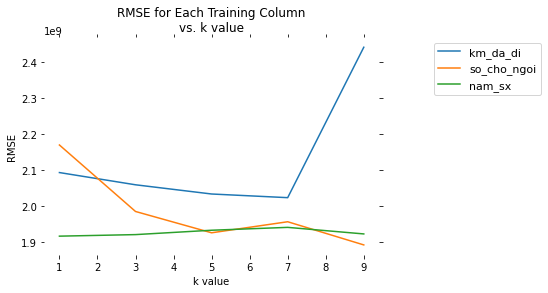

In [214]:
fig, ax = plt.subplots(1)

for key, values in rmse_uni.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE for Each Training Column\nvs. k value')
    ax.tick_params(top="off", left="off", right="off", bottom='off')
    ax.legend(bbox_to_anchor=(1.5, 1), prop={'size': 11})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

In [215]:
# Multivariate model
def knn_train_test(features, target_column, df, k):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Split the dataset
    train_set = rand_df.iloc[0:int(len(rand_df)/2)]
    test_set = rand_df.iloc[int(len(rand_df)/2):]
    
    # Train
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[features], train_set[target_column])
    
    # Predict
    predictions = knn.predict(test_set[features])
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_set[target_column], predictions))
    
    return rmse

In [217]:
avg_rmse = {}

for key, values in rmse_uni.items():
    avg_rmse[key] = np.mean(values)

avg_rmse = pd.Series(avg_rmse)
avg_rmse.sort_values()

hang           1.563691e+09
dong_xe        1.657488e+09
nam_sx         1.927137e+09
so_cho_ngoi    1.986088e+09
km_da_di       2.130011e+09
dtype: float64

In [218]:
data.columns

Index(['km_da_di', 'so_cho_ngoi', 'nam_sx', 'gia', 'dong_xe', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng', 'xuat_xu_Lắp ráp trong nước',
       'xuat_xu_Nhập khẩu'],
      dtype='object')

In [224]:
features = {
        'best_2': ['kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon'],
        'best_3': ['hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động'],
        'best_4': ['nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện',],
        'best_5': ['tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'],
        'best_6': ['xuat_xu_Lắp ráp trong nước',
       'xuat_xu_Nhập khẩu']
    } 

# features = {
#         'best_2': ['kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
#        'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
#        'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
#        'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon'],
#     } 

rmse_uti_onehot = {}
target_column = 'gia'
k = 5

for key, value in features.items():
    rmse_uti_onehot[key] = knn_train_test(value, target_column, normal_data, k)
    
pd.Series(rmse_uti_onehot).sort_values()

best_2    1.903034e+09
best_3    1.910959e+09
best_5    1.966865e+09
best_6    1.981204e+09
best_4    1.995818e+09
dtype: float64

In [229]:
features = {
        'best_2': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng', 'xuat_xu_Lắp ráp trong nước',
       'xuat_xu_Nhập khẩu'],
        'best_3': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'], # bỏ xuât xứ
        'best_4': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'], # bỏ xuất xử, bỏ dòng xe
        'best_5': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'], # bỏ kiểu dáng,  bỏ xuất xử, bỏ dòng xe
      #   'best_6': ['xuat_xu_Lắp ráp trong nước',
      #  'xuat_xu_Nhập khẩu']
    } 


rmse_multi = {}
target_column = 'gia'
k = 5

for key, value in features.items():
    rmse_multi[key] = knn_train_test(value, target_column, normal_data, k)
    
pd.Series(rmse_multi).sort_values()

best_5    1.634676e+09
best_4    2.042201e+09
best_3    2.367461e+09
best_2    2.374702e+09
dtype: float64

In [230]:
features = {
        'best_2': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang'],
        'best_3': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon'],
      #   'best_4': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
      #  'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
      #  'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
      #  'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
      #  'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
      #  'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
      #  'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
      #  'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
      #  'tinh_trang_Đã sử dụng'], # bỏ xuất xử, bỏ dòng xe
      #   'best_5': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
      #  'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
      #  'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
      #  'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
      #  'tinh_trang_Đã sử dụng'], # bỏ kiểu dáng,  bỏ xuất xử, bỏ dòng xe
      #   'best_6': ['xuat_xu_Lắp ráp trong nước',
      #  'xuat_xu_Nhập khẩu']
    } 


rmse_multi = {}
target_column = 'gia'
k = 5

for key, value in features.items():
    rmse_multi[key] = knn_train_test(value, target_column, normal_data, k)
    
pd.Series(rmse_multi).sort_values()

best_3    2.195146e+09
best_2    2.196235e+09
dtype: float64

In [232]:
# chọn 3 model tốt nhất  ở bên trên để hyperparameter turning k

top_models = {
    'best_5': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'],
    'best_4': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'hang',
       'kieu_dang_Bán tải / Pickup', 'kieu_dang_Convertible/Cabriolet',
       'kieu_dang_Coupe', 'kieu_dang_Hatchback', 'kieu_dang_Kiểu dáng khác',
       'kieu_dang_Mui trần', 'kieu_dang_SUV / Cross over', 'kieu_dang_Sedan',
       'kieu_dang_Truck', 'kieu_dang_Van/Minivan', 'kieu_dang_Wagon',
       'hop_so_Bán tự động', 'hop_so_Số sàn', 'hop_so_Số tay',
       'hop_so_Tự động', 'nhien_lieu_Dầu', 'nhien_lieu_Hybrid',
       'nhien_lieu_Xăng', 'nhien_lieu_Điện', 'tinh_trang_Mới',
       'tinh_trang_Đã sử dụng'],
    'best_2': ['km_da_di', 'so_cho_ngoi', 'nam_sx', 'dong_xe', 'hang'],
}

k_values = list(range(1, 26))
rmse_multi_k = {}
rmse_current = []

for key, value in top_models.items():
    for k in k_values:
        rmse_current.append(knn_train_test(value, target_column, normal_data, k))
        
    rmse_multi_k[key] = rmse_current
    rmse_current = []
    
print(rmse_multi_k)

{'best_5': [2183114660.1388917, 2125336918.6507578, 1950718116.7778437, 1666605477.3692305, 1634676253.5627313, 1523233905.3974235, 1477704294.137595, 1526842393.9773352, 1531749050.2241745, 1672737074.0288758, 1618631873.711005, 1569934730.7314327, 1531953573.8189888, 1529147862.1371095, 1558125455.1582105, 1532037504.881868, 1550520140.020328, 1559818492.8292272, 1540541146.8978987, 1523904034.864591, 1525978050.6369705, 1521631939.3283029, 1530947358.1489058, 1522881362.346167, 1522679566.731059], 'best_4': [3282521822.6791673, 2468077200.7840366, 2300926887.7750382, 2187195843.9933357, 2042201364.0560281, 1837383806.2199345, 1916905761.6901238, 1841653716.072221, 1745550743.9343877, 1704581256.0812624, 1651551994.7311645, 1669832079.0279424, 1627309678.746091, 1595425368.7578588, 1569497427.025073, 1572911830.7775502, 1554130062.428965, 1556435777.4218009, 1543798304.5777686, 1534260279.9025414, 1526748552.0051155, 1519204610.893939, 1526092877.9726896, 1523470149.8996806, 15222559

{'best_5': [1477704294.137595, 6], 'best_4': [1519204610.893939, 21], 'best_2': [1104584287.4321675, 0]}


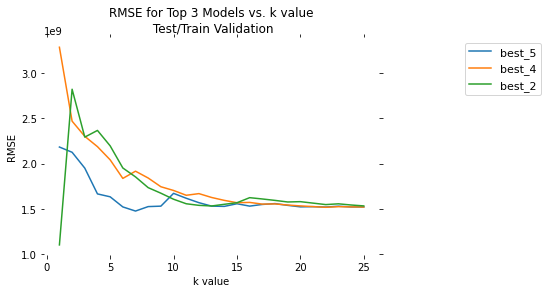

In [233]:
# Returns a dict with the min value of every key's list and its index the list
def min_key_value(dictionary):
    min_values = {}
    for k, v in dictionary.items():
        min_values[k] = [min(v), v.index(min(v))]
        
    return min_values
        
best_k = min_key_value(rmse_multi_k)
print(best_k)

# Plot results
fig, ax = plt.subplots(1)

for key, values in rmse_multi_k.items():
    ax.plot(k_values, values, label=key)
    ax.set_xlabel('k value')
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE for Top 3 Models vs. k value\n Test/Train Validation')
    ax.tick_params(top="off", left="off", right="off", bottom='off')
    ax.legend(bbox_to_anchor=(1.5, 1), prop={'size': 11})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)